# 10Alytics Capstone Project- Blossom Bank PLC

## Online Payments Fraud Detection

### Problem Definition

- Identification of transaction types that can lead to fraud.

- Identification of fraud in payment.

### How will the business benefit from your solution

Given the insight gained from the data set, Blossom Bank can choose to adopt the use of any of the ML Algorithms tested to Block Fake Accounts, Detect Payment Fraud and Prevent Content Spam.

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Inspection

In [2]:
# Load the dataset - Online Payment Fraud Detection.csv

df = pd.read_csv(r'C:\Users\DANIEL\Downloads\DATA\CAPSTONE PROJECT\Online Payment Fraud Detection.csv')

In [3]:
# View Data (first 5 rows of the data set)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
# Buttom 5 rows

df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


## Data Dictionary

• step: represents a unit of time where 1 step equals 1 hour

• type: type of online transaction

• amount: the amount of the transaction

• nameOrig: customer starting the transaction

• oldbalanceOrg: balance before the transaction

• newbalanceOrig: balance after the transaction

• nameDest: recipient of the transaction

• oldbalanceDest: initial balance of recipient before the transaction

• newbalanceDest: the new balance of the recipient after the transaction

• isFraud: fraud transaction

In [5]:
# Rename the column headers

df.columns = ["step", "transaction type", "amount", "customer id", "previous balance", "present balance", "receiver id", "receiver previous balance", "receiver present balance", "fraudulent transaction"]

df.head()

,step,transaction type,amount,customer id,previous balance,present balance,receiver id,receiver previous balance,receiver present balance,fraudulent transaction
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
# Data verification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   step                       1048575 non-null  int64  
 1   transaction type           1048575 non-null  object 
 2   amount                     1048575 non-null  float64
 3   customer id                1048575 non-null  object 
 4   previous balance           1048575 non-null  float64
 5   present balance            1048575 non-null  float64
 6   receiver id                1048575 non-null  object 
 7   receiver previous balance  1048575 non-null  float64
 8   receiver present balance   1048575 non-null  float64
 9   fraudulent transaction     1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
# Dimension of the data

df.shape

(1048575, 10)

In [8]:
# Statistical Analysis of the data

df.describe().astype(int)

,step,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [9]:
# Missing Value

df.isnull().sum()

step                         0
transaction type             0
amount                       0
customer id                  0
previous balance             0
present balance              0
receiver id                  0
receiver previous balance    0
receiver present balance     0
fraudulent transaction       0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values in dataset'}>

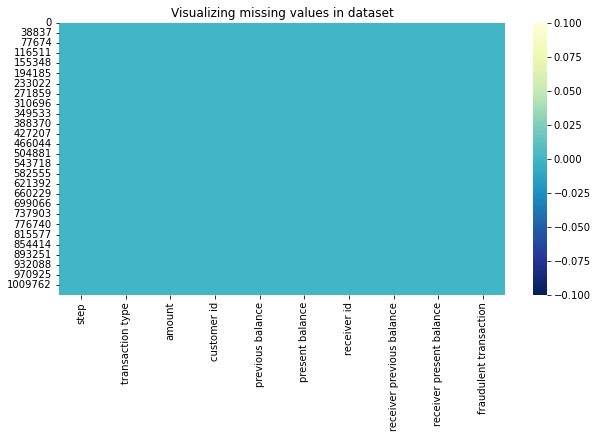

In [10]:
# Visualizing missing values

plt.figure(figsize = (10, 5))
plt.title("Visualizing missing values in dataset")
sns.heatmap(df.isnull(), cbar=True, cmap="YlGnBu_r")

## Exploratory Data Analysis

### Univariate Analysis

In [11]:
# Drop redundant columns

df.drop(["customer id", "receiver id"], axis = 1, inplace = True)

In [12]:
df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [13]:
# Creating new columns for easy visualization

In [14]:
# amount

# create a function that categorises amount

def amount_bracket(amount):
    if amount <= 2000000:
        return "<=2M"
    elif amount <=4000000:
        return "<=4M"
    elif amount <=6000000:
        return "<=6M"
    elif amount <= 8000000:
        return "<=8M"
    else: 
        return ">10M)"
    
# create a new function for amount category

df["amount_group"] = df["amount"].apply(amount_bracket)

df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,<=2M
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,<=2M
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,<=2M


Text(0, 0.5, 'Count of Amount Group')

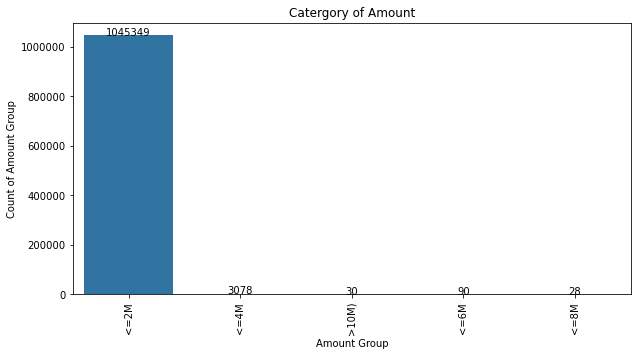

In [15]:
# visualize amount group

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(x = "amount_group", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="amount_group", data=df)
plt.title("Catergory of Amount")
plt.xlabel("Amount Group")
plt.ylabel("Count of Amount Group")

In [16]:
# previous balance

# create a function that categorises previous balance

def pb_bracket(previous_balance):
    if previous_balance <= 7780000:
        return "<=7.7M"
    elif previous_balance <=15560000:
        return "<=15.5M"
    elif previous_balance <=23340000:
        return "<=23.3M"
    elif previous_balance <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"
    
# create a new function for previous balance category

df["previous_balance_group"] = df["previous balance"].apply(pb_bracket)

df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group,previous_balance_group
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,<=2M,<=7.7M
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,<=2M,<=7.7M
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,<=2M,<=7.7M


Text(0, 0.5, 'Count of Previous Balance Group')

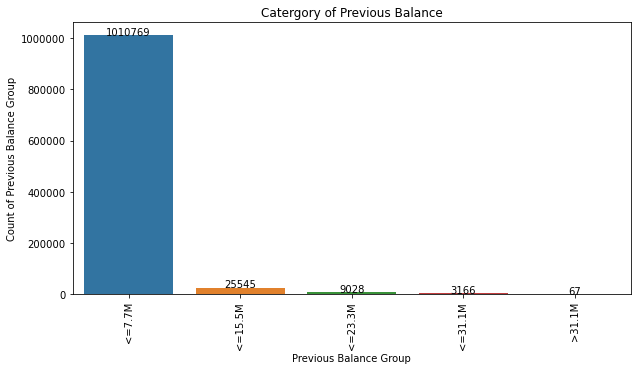

In [17]:
# visualize previous balance

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(x = "previous_balance_group", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="previous_balance_group", data=df)
plt.title("Catergory of Previous Balance")
plt.xlabel("Previous Balance Group")
plt.ylabel("Count of Previous Balance Group")

In [18]:
# present balance

# create a function that categorises present balance

def pb_bracket(present_balance):
    if present_balance <= 7780000:
        return "<=7.7M"
    elif present_balance <=15560000:
        return "<=15.5M"
    elif present_balance <=23340000:
        return "<=23.3M"
    elif present_balance <= 31120000:
        return "<=31.1M"
    else: 
        return ">31.1M"
    
# create a new function for present balance category

df["present_balance_group"] = df["present balance"].apply(pb_bracket)

df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group,previous_balance_group,present_balance_group
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M,<=7.7M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M,<=7.7M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,<=2M,<=7.7M,<=7.7M
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,<=2M,<=7.7M,<=7.7M


Text(0, 0.5, 'Count of Present Balance Group')

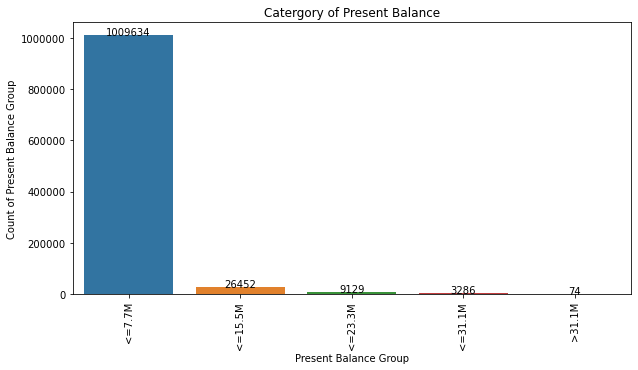

In [19]:
# visualize present balance

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(x = "present_balance_group", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="present_balance_group", data=df)
plt.title("Catergory of Present Balance")
plt.xlabel("Present Balance Group")
plt.ylabel("Count of Present Balance Group")

In [20]:
# receiver previous balance

# create a function that categorises receiver previous balance

def rpb_bracket(receiver_previous_balance):
    if receiver_previous_balance <= 8420000:
        return "<=8.4M"
    elif receiver_previous_balance <= 16840000:
        return "<=16.8M"
    elif receiver_previous_balance <= 25260000:
        return "<=25.2M"
    elif receiver_previous_balance <= 33680000:
        return "<=33.6M"
    else:
        return ">33.6M)"
    
# create a new function for receiver previous balance category

df["receiver_previous_balance_group"] = df["receiver previous balance"].apply(rpb_bracket)

df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group,previous_balance_group,present_balance_group,receiver_previous_balance_group
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M


Text(0, 0.5, 'Count of Receiver Previous Balance Group')

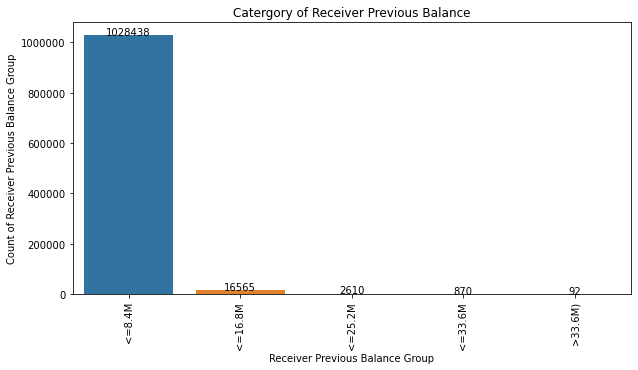

In [21]:
# receiver previous balance

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(x = "receiver_previous_balance_group", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="receiver_previous_balance_group", data=df)
plt.title("Catergory of Receiver Previous Balance")
plt.xlabel("Receiver Previous Balance Group")
plt.ylabel("Count of Receiver Previous Balance Group")

In [22]:
# receiver present balance

# create a function that categorises receiver present balance

def rpb_bracket(receiver_present_balance):
    if receiver_present_balance <= 8420000:
        return "<=8.4M"
    elif receiver_present_balance <= 16840000:
        return "<=16.8M"
    elif receiver_present_balance <= 25260000:
        return "<=25.2M"
    elif receiver_present_balance <= 33680000:
        return "<=33.6M"
    else:
        return ">33.6M)"
    
# create a new function for receiver present balance category

df["receiver_present_balance_group"] = df["receiver present balance"].apply(rpb_bracket)

df.head()

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group,previous_balance_group,present_balance_group,receiver_previous_balance_group,receiver_present_balance_group
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M


Text(0, 0.5, 'Count of Receiver Present Balance Group')

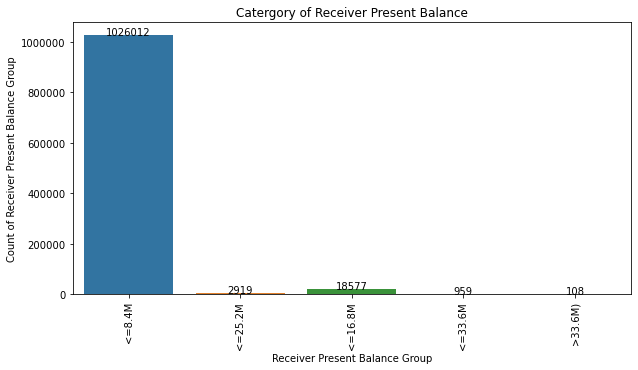

In [23]:
# receiver present balance

plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
viz = sns.countplot(x = "receiver_present_balance_group", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="receiver_present_balance_group", data=df)
plt.title("Catergory of Receiver Present Balance")
plt.xlabel("Receiver Present Balance Group")
plt.ylabel("Count of Receiver Present Balance Group")

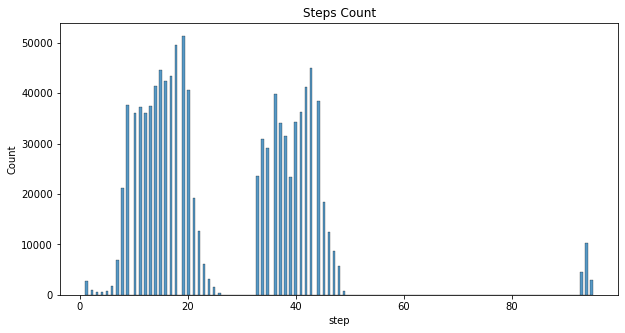

In [24]:
# step

plt.figure(figsize = (10,5))
sns.histplot(x = 'step', data = df)
plt.title('Steps Count')
plt.show()

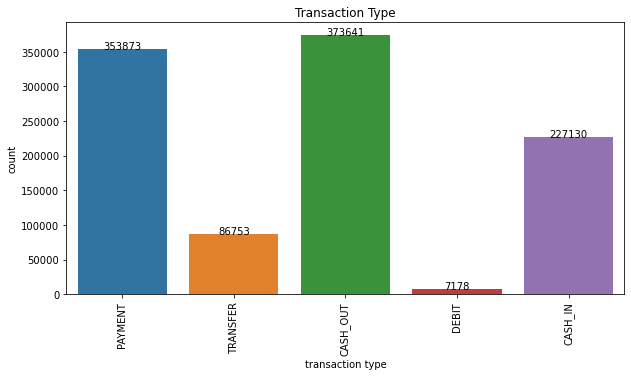

In [25]:
# create visualization for transaction type 

plt.figure(figsize = (10,5))
viz = sns.countplot(x="transaction type", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="transaction type", data=df)
sns.countplot(x ='transaction type', data=df)
plt.title('Transaction Type')
plt.show()

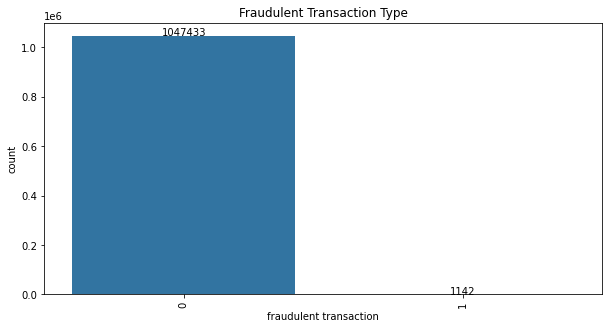

In [26]:
# fraudulent transaction

# create a function that categorises fraudulent transaction

def ft_group(fraudulent_transaction):
    if fraudulent_transaction == 1:
        return 'Yes'
    else:
        return 'No'
    
df['ft_group'] = df['fraudulent transaction'].apply(ft_group)

# create visualization for fraudulent transaction

plt.figure(figsize = (10,5))
viz = sns.countplot(x="fraudulent transaction", data = df)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="fraudulent transaction", data=df)
sns.countplot(x ='fraudulent transaction', data=df)
plt.title('Fraudulent Transaction Type')
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


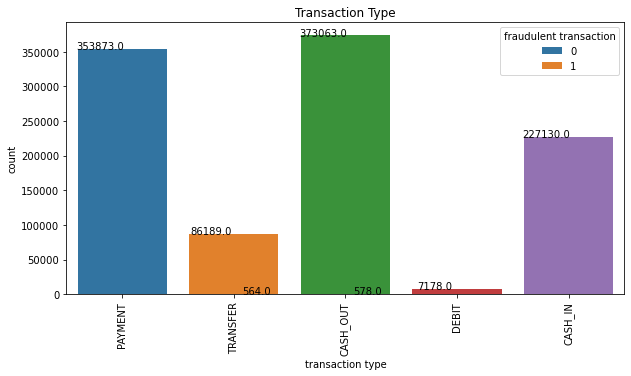

In [27]:
#Create visualization for transaction type and fraudulent transaction

plt.figure(figsize = (10,5))
viz = sns.countplot(x="transaction type", data = df, hue="fraudulent transaction")
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
sns.countplot(x="transaction type", data=df)
sns.countplot(x ="transaction type", data=df)
plt.title('Transaction Type')
plt.show()

<AxesSubplot:title={'center':'Fraud Transaction Category'}, ylabel='ft_group'>

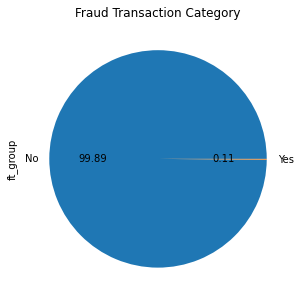

In [28]:
# fraudulent transaction

# create a function that categorises fraudulent transaction

def ft_group(fraudulent_transaction):
    if fraudulent_transaction == 1:
        return 'Yes'
    else:
        return 'No'
    
df['ft_group'] = df['fraudulent transaction'].apply(ft_group)

#Create visualization for fraudulent transaction

plt.figure(figsize = (10,5))
plt.title('Fraud Transaction Category')
df['ft_group'].value_counts(normalize=True).plot.pie(autopct="%.2f")

### Bivariate Analysis

Text(0.5, 1.0, 'Transaction type by Amount')

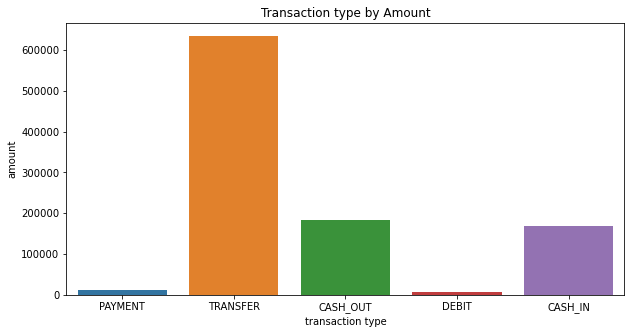

In [29]:
# transaction type by amount

fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot( x = "transaction type", y = "amount", data = df, ci = None)
plt.title('Transaction type by Amount')

### Multivariate Analysis

Text(0.5, 1.0, 'Transaction type by Amount Per Fraud Transaction')

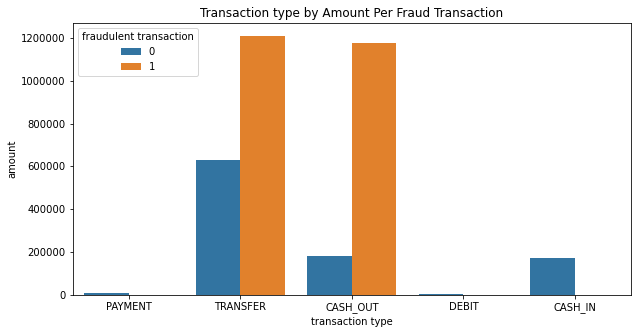

In [30]:
# Transaction Type by Amount Per Fraud Transaction

fig, ax1 = plt.subplots(figsize = (10,5))
plt.ticklabel_format(style='plain')
sns.barplot(ax =ax1, x = "transaction type", y = "amount", data = df, hue = "fraudulent transaction", ci = None)
plt.title('Transaction type by Amount Per Fraud Transaction')

### Correlation Analysis

<AxesSubplot:>

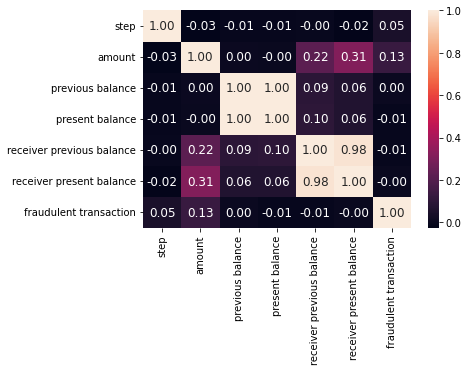

In [31]:
# correlation Analysis

correl = df.corr()


# num = 10

# cols = corel.nlargest(num, "target")["target"].index
sns.heatmap(correl, cbar=True, annot=True,fmt=".2f", annot_kws={'size': 12})

- Strong postive relationship betweeen previous balance and present balance.
- Weak positive relationship between fraudulent transaction and amount.

### Feature Engineering

### Encoding Categorical Variable- One Hot Code

In [32]:
# conversion of catergorical column to numeric

transaction_type_num = pd.get_dummies(df["transaction type"])
transaction_type_num.head(2)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0


In [33]:
# join the encoded variable back to the data frame

df = pd.concat([df, transaction_type_num], axis = 1)

# View data
print(df.shape)
df.head(2)

(1048575, 19)


,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,amount_group,previous_balance_group,present_balance_group,receiver_previous_balance_group,receiver_present_balance_group,ft_group,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,<=2M,<=7.7M,<=7.7M,<=8.4M,<=8.4M,No,0,0,0,1,0


In [34]:
# drop other categorical data columns used for visualization purpose

df.drop(['amount_group',
       'previous_balance_group', 'present_balance_group',
       'receiver_previous_balance_group', 'receiver_present_balance_group', 'ft_group'], axis = 1, inplace = True)

df.head(2)

,step,transaction type,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0


In [35]:
# drop transaction type column used for the one hot code

df.drop('transaction type', axis = 1, inplace = True)

df.head(2)

,step,amount,previous balance,present balance,receiver previous balance,receiver present balance,fraudulent transaction,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0


### Creating Target X and y

In [36]:
y = df['fraudulent transaction'] 
X = df.drop('fraudulent transaction', axis=1)

In [37]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: fraudulent transaction, dtype: int64

In [38]:
X.head()

,step,amount,previous balance,present balance,receiver previous balance,receiver present balance,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### ML Algorithm 1

In [39]:
# Machine Learning
from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression

# ML Metrics
from sklearn.metrics import accuracy_score

# To disable warnings

import warnings
warnings.filterwarnings("ignore")

In [40]:
df.columns

Index(['step', 'amount', 'previous balance', 'present balance',
       'receiver previous balance', 'receiver present balance',
       'fraudulent transaction', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [41]:
# Data = x

x = df[['step', 'amount', 'previous balance', 'present balance',
       'receiver previous balance', 'receiver present balance',
       'fraudulent transaction', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER']]

# Label = y

y = df[["fraudulent transaction"]]

In [42]:
# Load three ML Algorithms

classifiers = [[RandomForestClassifier(), "Random Forest"], [KNeighborsClassifier(), "K-Nearest Neighbors"], [LogisticRegression(), "Logistic Regression"]]

In [43]:
# Train Test Split (Training on 80% while Testing is 20%)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 

accuracy_score_list = {}

for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name= i[1]

predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict)

accuracy_score_list[model_name] = ([str(round(accuracy * 100, 2)) + "%"])

if model_name != classifiers[-1][1]:
    print ('')

In [44]:
accuracy_score_list

{'Logistic Regression': ['99.9%']}

In [45]:
print ("Accuracy Score of ML Algorithms")
as_df = pd.DataFrame(accuracy_score_list)
as_df

Accuracy Score of ML Algorithms


,Logistic Regression
0,99.9%


### ML Algorithm 2

In [80]:
# Machine Learning
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [83]:
from sklearn.linear_model import LinearRegression

clf = LogisticRegression()

In [84]:
clf.fit(X_train,y_train)

LogisticRegression()

In [85]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [86]:
y_test

,fraudulent transaction
352304,0
613574,0
628513,0
946127,0
972737,0
...,...
66836,0
222338,0
288817,0
187197,0


In [87]:
clf.score(X_test,y_test)

0.9989938726366736

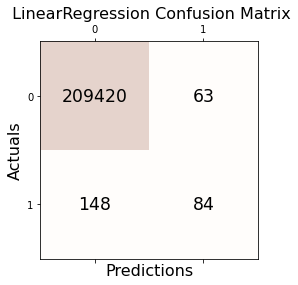

Precision: 0.57
Recall: 0.36


In [88]:
# Calculate the confusion matrix for LinearRegressionClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))

# Print the confusion matrix

fig, ax = plt.subplots(figsize=(8, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.2)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title(' LinearRegression Confusion Matrix', fontsize=16)
plt.show()

print('Precision: %.2f' % precision_score(y_test, clf.predict(X_test)))
print('Recall: %.2f' % recall_score(y_test, clf.predict(X_test)))

In [72]:
# Machine Learning
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [75]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
y_test

,fraudulent transaction
29285,0
960915,0
266305,0
33816,0
849049,0
...,...
711547,0
515951,0
780762,0
240691,0


In [78]:
clf.score(X_test,y_test)

1.0

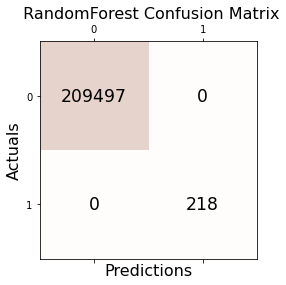

Precision: 1.00
Recall: 1.00


In [79]:
# Calculate the confusion matrix for RandomForestClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))

# Print the confusion matrix

fig, ax = plt.subplots(figsize=(8, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.2)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title(' RandomForest Confusion Matrix', fontsize=16)
plt.show()

print('Precision: %.2f' % precision_score(y_test, clf.predict(X_test)))
print('Recall: %.2f' % recall_score(y_test, clf.predict(X_test)))

In [60]:
# Machine Learning
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

In [63]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
y_test

,fraudulent transaction
86486,0
909175,0
787571,0
912970,0
250445,0
...,...
773357,0
989048,0
276770,0
117326,0


In [66]:
clf.score(X_test,y_test)

0.9994230264883294

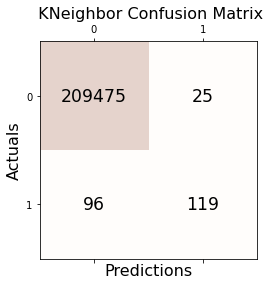

Precision: 0.83
Recall: 0.55


In [70]:
# Calculate the confusion matrix for KNeighborClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))

# Print the confusion matrix

fig, ax = plt.subplots(figsize=(8, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.2)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title(' KNeighbor Confusion Matrix', fontsize=16)
plt.show()

print('Precision: %.2f' % precision_score(y_test, clf.predict(X_test)))
print('Recall: %.2f' % recall_score(y_test, clf.predict(X_test)))

### Summary

Random Forest Classifier is selected as a better ML Algorithm to be deployed by Blossom Bank to predict online payment fraud as it has 0 FP and 0 FN with 100% accuracy.